In [1]:
import geopandas as gpd
from shapely.geometry import LineString
import pandas as pd
import numpy as np
import networkx as nx
import sqlite3
import matplotlib as mpl
import matplotlib.pyplot as plt

/opt/homebrew/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    cable_coor = pd.read_sql("select  geometry, lp.cable_id, lp.cable_name, lp.cable_length, cccp.capacity, cccp.cost, cccp.pair from landing_points lp left join cable_coor cc on lp.cable_id = cc.id left join cable_cost_capacity_pair cccp on lp.cable_id = cccp.cable_id where capacity group by geometry",con=con)
# cable_shap = gpd.GeoDataFrame(cable_coor, crs=4326)

In [3]:
cable_coor

,geometry,cable_id,cable_name,cable_length,capacity,cost,pair
0,MULTILINESTRING ((-0.134425668831739 50.828479...,crosschannel-fibre,CrossChannel Fibre,149.0,2400.00,3.875,96.0
1,MULTILINESTRING ((-0.204315619320994 5.5582858...,glo-1,Glo-1,9800.0,2.50,260.000,2.0
2,MULTILINESTRING ((-1.617778330734808 54.978249...,no-uk,NO-UK,713.0,216.00,20.000,8.0
3,MULTILINESTRING ((-1.968324369680687 46.693996...,dunant,Dunant,6400.0,250.00,165.000,12.0
4,MULTILINESTRING ((-10.349918432080813 33.93964...,sat-3wasc,SAT-3/WASC,14350.0,0.80,370.000,2.0
...,...,...,...,...,...,...,...
239,MULTILINESTRING ((80.2429873910547 13.06385310...,tata-tgn-tata-indicom,Tata TGN-Tata Indicom,3175.0,5.12,90.000,8.0
240,MULTILINESTRING ((80.2429873910547 13.06385310...,i2i-cable-network-i2icn,i2i Cable Network (i2icn),3200.0,84.00,90.000,8.0
241,MULTILINESTRING ((9.250947682481751 3.00276094...,ceiba-2,Ceiba-2,290.0,24.00,15.000,3.0
242,MULTILINESTRING ((90.45001016030389 -18.880139...,oman-australia-cable-oac,Oman Australia Cable (OAC),9800.0,39.00,242.500,3.0


In [4]:
cable_coor["geometry"] = cable_coor["geometry"].str.replace("MULTILINESTRING \(\(", "").str.replace("\)", "").str.replace("'","")


data = pd.DataFrame()

for row in range(cable_coor.shape[0]):
    coor_list = cable_coor.iloc[row,0].split(', (')
    for x in coor_list:
        seg = pd.DataFrame()
        abc = x.split(', ')
        # print(abc)
        for y in abc:
            a = {'lon1': y.split(' ')[0], 'lat1': y.split(' ')[1], 'capacity': cable_coor.iloc[row,cable_coor.columns.get_loc('capacity')], 'cost': cable_coor.iloc[row,cable_coor.columns.get_loc('cost')], 'pair': cable_coor.iloc[row,cable_coor.columns.get_loc('pair')], 'cable_id': cable_coor.iloc[row,cable_coor.columns.get_loc('cable_id')], 'cable_name': cable_coor.iloc[row,cable_coor.columns.get_loc('cable_name')]}
            seg = seg.append(a,ignore_index=True)
        seg["lon1"] = seg["lon1"].astype("float64")
        seg["lat1"] = seg["lat1"].astype("float64")
        seg['lon2'] = seg['lon1'].shift()
        seg['lat2'] = seg['lat1'].shift()
        seg["capacity"] = seg["capacity"].astype("float64")
        seg["cost"] = seg["cost"].astype("float64")
        seg["pair"] = seg["pair"].astype("float64")
        
        data = data.append(seg.dropna(),ignore_index=True)
data

/var/folders/93/98m4gg790h36hw_xcd31b1d40000gn/T/ipykernel_54877/2654795470.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cable_coor["geometry"] = cable_coor["geometry"].str.replace("MULTILINESTRING \(\(", "").str.replace("\)", "").str.replace("'","")


,lon1,lat1,capacity,cost,pair,cable_id,cable_name,lon2,lat2
0,0.000074,50.597677,2400.0,3.875,96.0,crosschannel-fibre,CrossChannel Fibre,-0.134426,50.828479
1,0.450074,50.022920,2400.0,3.875,96.0,crosschannel-fibre,CrossChannel Fibre,0.000074,50.597677
2,0.797774,49.877307,2400.0,3.875,96.0,crosschannel-fibre,CrossChannel Fibre,0.450074,50.022920
3,-0.449925,3.279837,2.5,260.000,2.0,glo-1,Glo-1,-0.204316,5.558286
4,-0.449925,2.156121,2.5,260.000,2.0,glo-1,Glo-1,-0.449925,3.279837
...,...,...,...,...,...,...,...,...,...
4207,93.406383,8.079176,25.6,170.000,4.0,chennai-andaman-nicobar-islands-cable,Chennai-Andaman & Nicobar Islands Cable,93.481453,8.172274
4208,93.459583,7.967777,25.6,170.000,4.0,chennai-andaman-nicobar-islands-cable,Chennai-Andaman & Nicobar Islands Cable,93.406383,8.079176
4209,93.543758,7.856348,25.6,170.000,4.0,chennai-andaman-nicobar-islands-cable,Chennai-Andaman & Nicobar Islands Cable,93.459583,7.967777
4210,93.937508,7.298763,25.6,170.000,4.0,chennai-andaman-nicobar-islands-cable,Chennai-Andaman & Nicobar Islands Cable,93.543758,7.856348


In [5]:
data.dropna()
gdf = gpd.GeoDataFrame(data)
    # data,geometry=gpd.points_from_xy(data.lon1, data.lat1), crs=4326)
gdf['fr_point'] = gpd.points_from_xy(x=gdf['lon1'],y=gdf['lat1'])
gdf['to_point'] = gpd.points_from_xy(x=gdf['lon2'],y=gdf['lat2'])
gdf['fr_id'] = round((round(gdf['lon1'],5) + round(gdf['lat1'],5))*100000,0)
gdf['to_id'] = round((round(gdf['lon2'],5) + round(gdf['lat2'],5))*100000,0)
gdf['distance_from_previous'] = gdf['fr_point'].distance(gdf['to_point'])

# gdf['distance_from_previous'] = gdf.distance(gdf.shift(1))

In [6]:
# gdf = gdf.iloc[1::,]
gdf['line'] = gdf.apply(lambda row: LineString([row['fr_point'], row['to_point']]), axis=1) #Create a linestring column
geo_df = gpd.GeoDataFrame(gdf, geometry=gdf['line'])


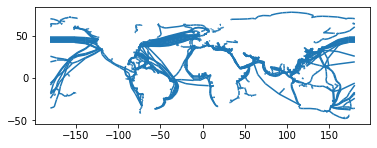

In [7]:
gdf.plot()
gdf.to_csv("/Users/dijiongyuequ/Downloads/345.csv")

In [8]:
gdf = gdf.reset_index( )


In [9]:
gdf.sample(5)

,index,lon1,lat1,capacity,cost,pair,cable_id,cable_name,lon2,lat2,fr_point,to_point,fr_id,to_id,distance_from_previous,line,geometry
1233,1233,-67.387378,18.465364,8.40,250.0,12.0,arcos,ARCOS,-67.049878,18.678647,POINT (-67.38738 18.46536),POINT (-67.04988 18.67865),-4892202.0,-4837123.0,0.399244,LINESTRING (-67.38737802620926 18.465364393137...,"LINESTRING (-67.38738 18.46536, -67.04988 18.6..."
3839,3839,32.540673,29.638336,2.56,900.0,8.0,falcon,FALCON,32.709426,29.344567,POINT (32.54067 29.63834),POINT (32.70943 29.34457),6217901.0,6205400.0,0.338789,LINESTRING (32.54067268382204 29.6383360936263...,"LINESTRING (32.54067 29.63834, 32.70943 29.34457)"
2072,2072,111.824995,7.744889,28.00,400.0,6.0,southeast-asia-japan-cable-sjc,Southeast Asia Japan Cable (SJC),114.299993,5.061987,POINT (111.82500 7.74489),POINT (114.29999 5.06199),11956989.0,11936198.0,3.650148,LINESTRING (111.82499501806419 7.7448890525513...,"LINESTRING (111.82500 7.74489, 114.29999 5.06199)"
656,656,-78.749870,27.264712,60.00,280.0,6.0,monet,Monet,-77.849871,27.763589,POINT (-78.74987 27.26471),POINT (-77.84987 27.76359),-5148516.0,-5008628.0,1.029017,LINESTRING (-78.74986997691342 27.264711877833...,"LINESTRING (-78.74987 27.26471, -77.84987 27.7..."
3206,3206,33.750050,32.338312,38.40,190.0,6.0,mednautilus-submarine-system,MedNautilus Submarine System,31.050052,33.095517,POINT (33.75005 32.33831),POINT (31.05005 33.09552),6608836.0,6414557.0,2.804167,LINESTRING (33.75005032708759 32.3383115780128...,"LINESTRING (33.75005 32.33831, 31.05005 33.09552)"


In [10]:
G = nx.from_pandas_edgelist(gdf, 'fr_id', 'to_id', edge_attr=['capacity'], create_using=nx.Graph)


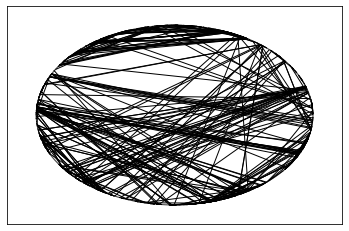

In [11]:
nx.draw_networkx_edges(G, pos=nx.circular_layout(G))


In [12]:
flow_value, flow_dict = nx.maximum_flow(G, 15215929.0, 6721108.0,capacity = 'capacity')  # 求网络最大流

# flow = nx.maximum_flow_value(G, -7078476.0, 6796544)  # 求网络最大流

In [13]:
# print(flow)
# print(flow_value)
# flow_dict

In [14]:

edgeCapacity = nx.get_edge_attributes(G, 'capacity')

edgeDict = {}  # 记录容量线路     外层的key为容量 value为一个记录该容量下的路径   内层的key为开始节点, value为结束节点

for i in flow_dict.keys():
    for j in flow_dict[i].keys():
        capacityBetweenTwoEdges = flow_dict[i][j]
        if flow_dict[i][j] > 0 :  # 网络最大流的边（流量>0）
            if capacityBetweenTwoEdges not in edgeDict: edgeDict[capacityBetweenTwoEdges] = {}
            edgeDict[capacityBetweenTwoEdges][i] = j
          


def num2color(values, cmap):
    """将数值映射为颜色"""
    norm = mpl.colors.Normalize(vmin=np.min(values), vmax=np.max(values))
    cmap = mpl.cm.get_cmap(cmap)
    return [cmap(norm(val)) for val in values]


temp = set()    

def getPath(path, road):

    pathroad = pd.DataFrame()
    for capacity in path:
        temp.add(capacity)
        for startNode, endNode  in path[capacity].items():
            # print(startNode, endNode)
            # len(path.keys())-1
            # fr_id and to_id might be in opposite order
            r = road[ (((road['fr_id'] == startNode) & (road['to_id'] == endNode)) | ((road['fr_id'] == endNode) & (road['to_id'] == startNode))) ]

            pathroad = pathroad.append(r)
    return pathroad
unfiltered_gdf = getPath(edgeDict, gdf)


In [15]:
edgeDict

{0.08: {14666495.0: 14716735.0,
  13991148.0: 13745143.0,
  14196087.0: 13991148.0,
  13745143.0: 13631148.0,
  13631148.0: 13597558.0,
  13597558.0: 13615967.0,
  13615967.0: 13614433.0,
  13614433.0: 13662594.0,
  13662594.0: 13776639.0,
  13776639.0: 14043529.0,
  14043529.0: 14179470.0,
  14179470.0: 14269457.0,
  14269457.0: 14441943.0,
  14441943.0: 14641989.0,
  14641989.0: 14670765.0,
  14670765.0: 14666495.0,
  16416987.0: 16334963.0,
  16312463.0: 16416987.0,
  16106230.0: 16312463.0,
  15969549.0: 16106230.0,
  15689049.0: 15969549.0,
  15568203.0: 15689049.0,
  15215929.0: 15121437.0,
  15121437.0: 14944761.0,
  14944761.0: 14647798.0,
  14647798.0: 14396148.0,
  14396148.0: 14196087.0,
  15485929.0: 16054823.0,
  16054823.0: 15984455.0,
  15290186.0: 15485929.0,
  15134870.0: 15290186.0,
  14914135.0: 15134870.0,
  14789332.0: 14914135.0,
  14716735.0: 14789332.0,
  15876448.0: 15690138.0,
  15587050.0: 15471180.0,
  15690138.0: 15587050.0,
  15471180.0: 15366836.0,
  1536

In [16]:

# Make a dictionary to map the capacity to a color from cmap
def sortCapacityList(capacityList):
    capacityList = list(set(temp))
    capacityList.sort(reverse= True)
    return capacityList
map_capacityColor = dict (zip( sortCapacityList(temp) , num2color(range(len(temp)), "RdBu") ))
# map_capacityColor
unfiltered_gdf = unfiltered_gdf[unfiltered_gdf['capacity'].isin(set(temp))]



In [17]:
map_capacityColor = dict (zip( sortCapacityList(temp) , num2color(range(len(temp)), "RdBu") ))
unfiltered_gdf['color'] = unfiltered_gdf["capacity"].map(map_capacityColor)


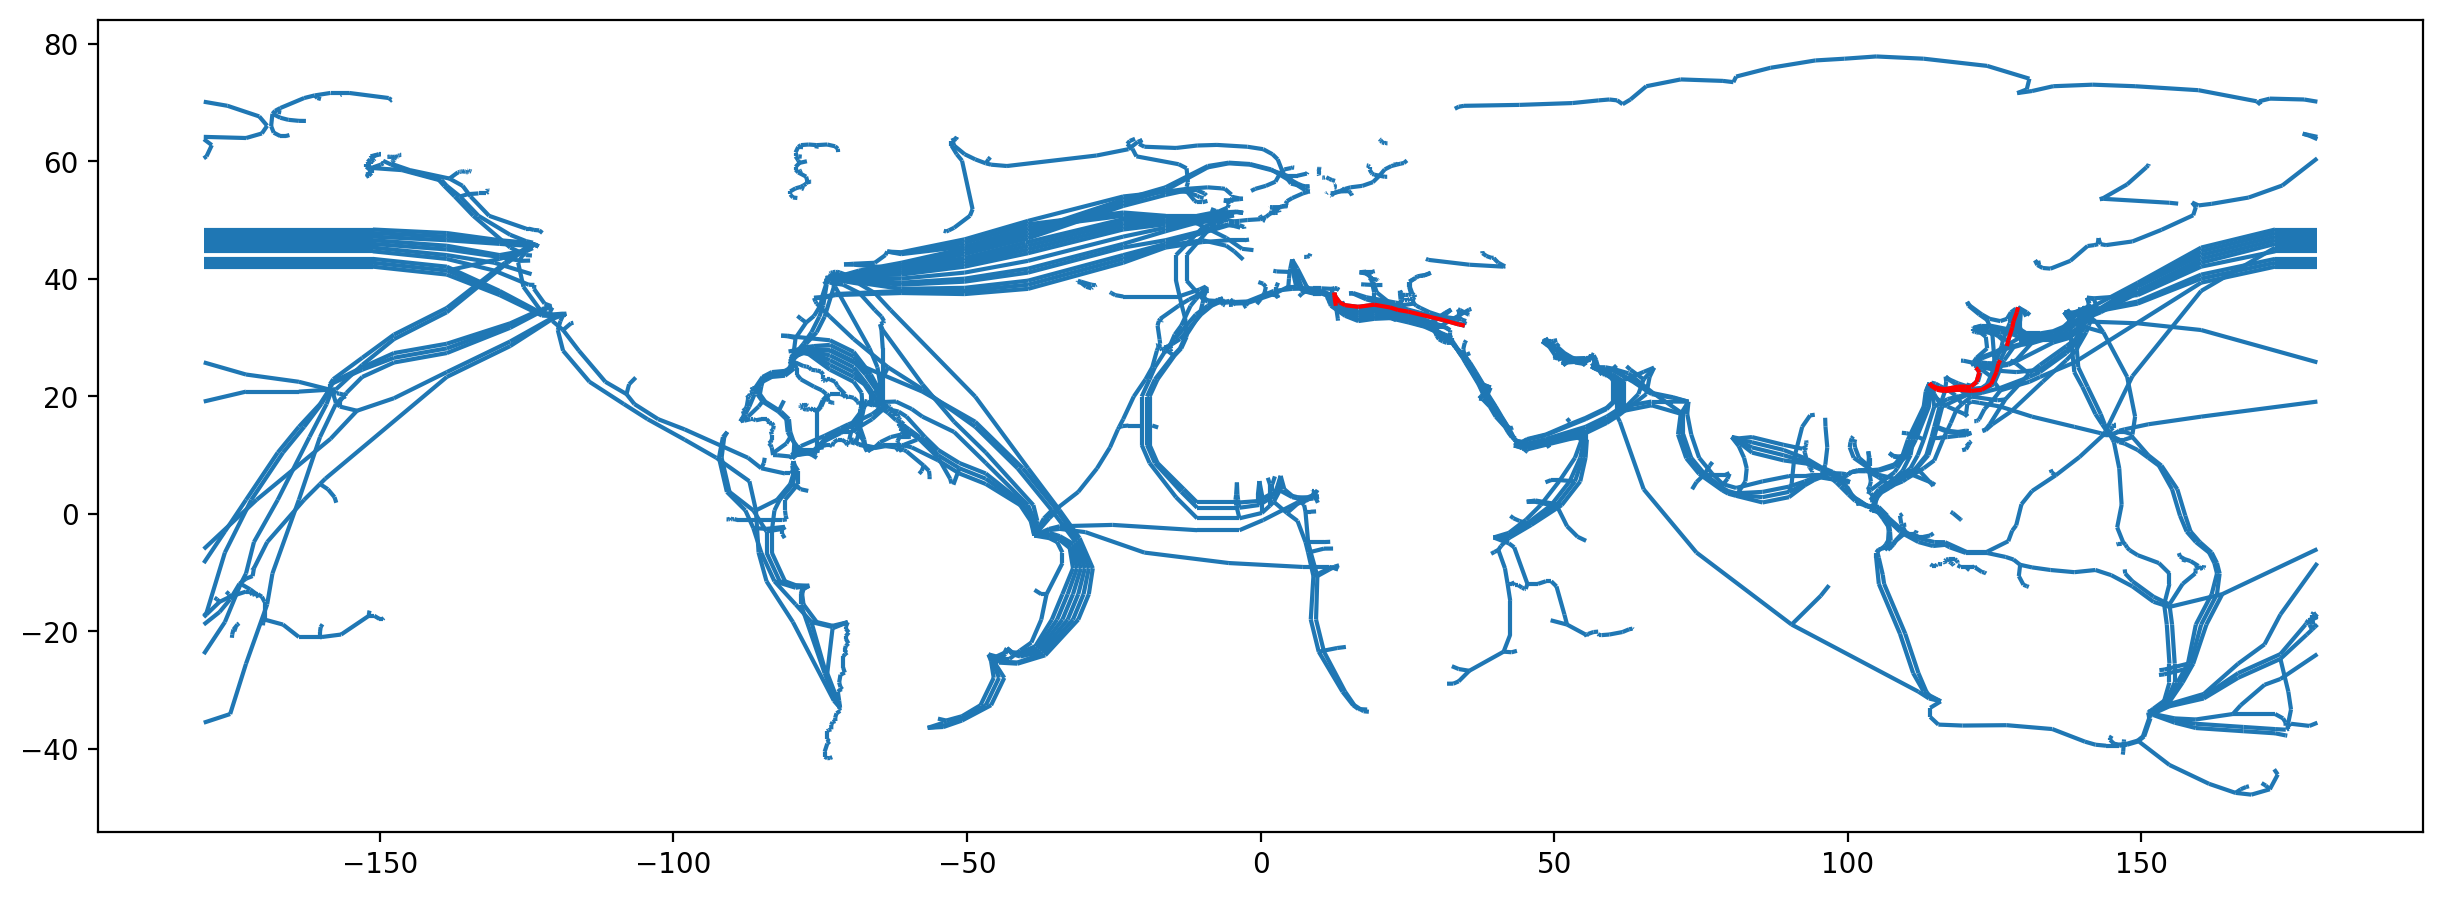

In [18]:

fig     = plt.figure(figsize=(15,10),dpi = 200)
ax      = plt.subplot(111)

gdf.plot(ax=ax)

unfiltered_gdf.plot(ax = ax, color='r')

unfiltered_gdf.to_csv("/Users/dijiongyuequ/Downloads/456.csv")

In [19]:
set(unfiltered_gdf["capacity"])

{0.0025, 0.08, 0.12}

In [20]:
# Test Code

# temp_dic = {5059775.0: {5069405.0: 1, 5047299.0: 0},
#  5069405.0: {5059775.0: 1}}
# dgeCapacity = nx.get_edge_attributes(G, 'capacity')
# edgeLabel = {}  # 边的标签
# for i in edgeCapacity.keys():  # 整理边的标签，用于绘图显示
#     edgeLabel[i] = f'c={edgeCapacity[i]:}'  # 边的容量
# edgeDict = {}  # 记录容量线路     外层的key为容量 value为一个记录该容量下的路径   内层的key为开始节点, value为结束节点

# for i in temp_dic.keys():
#     for j in temp_dic[i].keys():
#         capacityBetweenTwoEdges = temp_dic[i][j]
#         if temp_dic[i][j] > 0 :  # 网络最大流的边（流量>0）
#             if capacityBetweenTwoEdges not in edgeDict: edgeDict[capacityBetweenTwoEdges] = {}
#             edgeDict[capacityBetweenTwoEdges][i] = j
            
# edgeDict

In [21]:
maxFlowValue, maxFlowDict = nx.maximum_flow(G, -7078476.0, 6796544)  # 求网络最大流

# 数据格式转换
edgeCapacity = nx.get_edge_attributes(G, 'capacity')
edgeLabel = {}  # 边的标签
for i in edgeCapacity.keys():  # 整理边的标签，用于绘图显示
    edgeLabel[i] = f'c={edgeCapacity[i]:}'  # 边的容量
edgeLists = []  # 最大流的边的 list
for i in maxFlowDict.keys():
    for j in maxFlowDict[i].keys():
        edgeLabel[(i, j)] += ',f=' + str(maxFlowDict[i][j])  # 取出每条边流量信息存入边显示值
        if maxFlowDict[i][j] > 0:  # 网络最大流的边（流量>0）
            edgeLists.append((i,j))

# 输出显示
print("最大流值: ", maxFlowValue)
print("最大流的途径及流量: ", maxFlowDict)  # 输出最大流的途径和各路径上的流量
print("最大流的路径：", edgeLists)  # 输出最大流的途径

KeyError: (5069405.0, 5059775.0)

In [ ]:
path = nx.shortest_path(G, -7078476.0, 6796544, weight = 'length')

# def getPath(path, road):
#     pathroad = pd.DataFrame()
#     for i in range(5):
#         # len(path.keys())-1
#         node1 = path[list (path.keys())[i]]
#         print(node1)
#         node2 = path[list (path.keys())[i+1]]
#         print(node2)
#         r = road[(road['fr_id'] == node1) & (road['to_id'] == node2)]
#         pathroad = pathroad.append(r)
#     return pathroad

def getPath(path, road):
    pathroad = pd.DataFrame()
    for i in range(len(path)-1):
        # len(path.keys())-1
        node1 = path[i]
        node2 = path[i+1]
        # fr_id and to_id might be in opposite order
        r = road[ ((road['fr_id'] == node1) & (road['to_id'] == node2)) | (road['fr_id'] == node2) & (road['to_id'] == node1) ]
        pathroad = pathroad.append(r)
    return pathroad